## Preprocessing

**Identifying "is_successful" as our target variable**

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_new = application_df.drop(columns=["EIN", "NAME"])

In [4]:
# Determine the number of unique values in each column.
application_df_new.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
#Columns with more than 10 unique values, and the count of their unique values 
columns = ["APPLICATION_TYPE", "CLASSIFICATION", "INCOME_AMT", "ASK_AMT"]
unique_counts = application_df_new[columns].nunique()

print(unique_counts)

APPLICATION_TYPE      17
CLASSIFICATION        71
INCOME_AMT             9
ASK_AMT             8747
dtype: int64


<Axes: xlabel='APPLICATION_TYPE'>

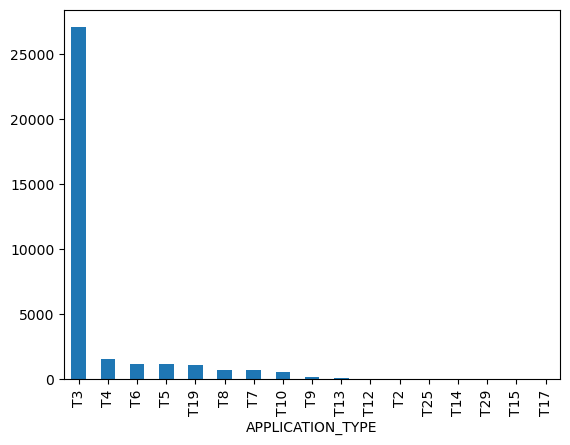

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df_new.APPLICATION_TYPE.value_counts().plot(kind="bar")

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13" ,"T12", "T2", "T25","T14","T29","T15","T17"]       

# Replace in dataframe
for app in application_types_to_replace:
    application_df_new['APPLICATION_TYPE'] = application_df_new['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df_new['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count = application_df_new['CLASSIFICATION'].value_counts()

In [9]:
len(classification_count)

71

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = classification_count[classification_count < 90]
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [12]:
application_df_new.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_data = ["AFFILIATION", "USE_CASE", "ORGANIZATION", "SPECIAL_CONSIDERATIONS", "APPLICATION_TYPE", "CLASSIFICATION", "INCOME_AMT"]
cat_Data = pd.get_dummies(application_df_new[categorical_data], drop_first=True)

In [15]:
# Dropping pre-dummies categorical data
application_df_new = application_df_new.drop(columns=categorical_data)

In [17]:
# Concatenating df with binaried caterogrical data
application_df_new = application_df_new.join(cat_Data)

In [24]:
# Split the preprocessed data into a training and testing dataset
X = application_df_new.drop(columns = "IS_SUCCESSFUL")
y = application_df_new["IS_SUCCESSFUL"]

# Split our preprocessed data into our features and target arrays
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y, shuffle=True, random_state=30)


In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [27]:
input_dim = X_train_scaled.shape[1]

In [61]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(layers.Dense(4, input_shape = (input_dim,), activation = "tanh"))

# Second hidden layer
nn.add(layers.Dense(8, activation="relu"))

# Output layer
nn.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 4)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Compile the model

nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [64]:
# Train the model

nn.fit(X_train_scaled,y_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.5641 - loss: 0.6809 - val_accuracy: 0.6985 - val_loss: 0.6131
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7019 - loss: 0.6082 - val_accuracy: 0.7191 - val_loss: 0.5771
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7098 - loss: 0.5830 - val_accuracy: 0.7243 - val_loss: 0.5658
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.7232 - loss: 0.5661 - val_accuracy: 0.7257 - val_loss: 0.5624
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.7267 - loss: 0.5629 - val_accuracy: 0.7262 - val_loss: 0.5609
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.7318 - loss: 0.5572 - val_accuracy: 0.7251 - val_loss: 0.5592
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.7276 - loss: 0.5615 - val_accuracy: 0.7241 - val_loss: 0.5591
Epoch 8/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7320 - loss: 0.5498 - 

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - 228us/step - accuracy: 0.7296 - loss: 0.5562
Loss: 0.5561880469322205, Accuracy: 0.7296404242515564


In [50]:
import joblib

In [38]:
joblib.dump(nn, "AlphabetSoupCharity.h5")